In [127]:
# подготовка: в консоли windows выполнить pip install wheel и затем pip install -U scikit-learn

import pandas as pd
#col_names = ['x1', 'x2', 'x3', 'x4', 'y']
df_train = pd.read_csv("logit_train.csv")
df_train.head()

,x1,x2,x3,x4,x5,x6,x7
0,145,25,2.1,27,9,51,0
1,130,23,2.4,22,7,45,0
2,150,21,1.9,29,12,57,0
3,141,19,2.5,23,15,53,0
4,137,17,2.3,25,10,49,0


In [128]:
factor_cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

X_train = df_train[factor_cols]

y_train = df_train['x7']

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
#матрица классификации:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_train)
print(cnf_matrix)

[[12  0]
 [ 0  8]]


In [131]:
print("Accuracy:",metrics.accuracy_score(y_train, y_train))
#Процент верно классифицированных значений в обучающей выборке

Accuracy: 1.0


In [132]:
print("Precision:",metrics.precision_score(y_train, y_train))
#Насколько часто модель оказывается права, когда делает новое предсказание

Precision: 1.0


In [133]:
print("Recall:",metrics.recall_score(y_train, y_train))
#Насколько часто модель оказывается права только относительно значений "1"

Recall: 1.0


In [134]:
df_test = pd.read_csv("logit_test.csv")

X_test=df_test[factor_cols]

#y_test=df_test.y

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0], dtype=int64)

In [135]:
#Функция  predict_proba предоставляет постериорные вероятности, что У примет значение 1.
#Функция predict выдает наиболее вероятную категорию для этой переменной (0 и 1).
#Иногда нужны просто эти категории, иногда нужно прояснить возможные неоднозначные наблюдения,
#для того, чтобы выяснить их наличие, случае следует вычислять постериорные вероятности. 

#Округлить эти значения до 3 знаков:

import numpy as np
np.round(model.predict_proba(X_test)[:,1], decimals=3)

array([0.005, 0.987, 0.996, 0.993, 0.   ])

In [136]:
#Если мы хотим записать данные вместо пустых значений в тестовой выборке:
df_test.y = np.round(model.predict_proba(X_test)[:,1], decimals=3)
df_test.y

C:\Users\Boss\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


array([0.005, 0.987, 0.996, 0.993, 0.   ])

In [139]:
#model evaluation
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit_regularized()
#должно появиться сообщение "optimization terminated successfully"
print(result.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0778735685929537e-10
            Iterations: 42
            Function evaluations: 48
            Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:                     x7   No. Observations:                   20
Model:                          Logit   Df Residuals:                       14
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                   1.000
Time:                        14:53:36   Log-Likelihood:            -2.1557e-09
converged:                       True   LL-Null:                       -13.460
Covariance Type:            nonrobust   LLR p-value:                 5.911e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\Boss\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Boss\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


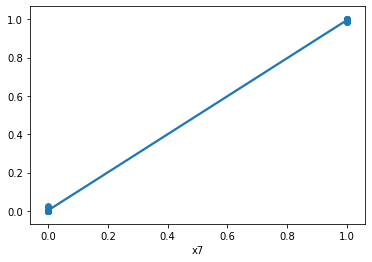

In [141]:
#теоретическая кривая регрессии
import seaborn as sns
probs = model.predict_proba(X_train)[:,1]
sns.regplot(x=df_train['x7'], y=probs, data=df_train, logistic=True, x_jitter=.05)